In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

#### 色空間変換

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-108.0..114.0].


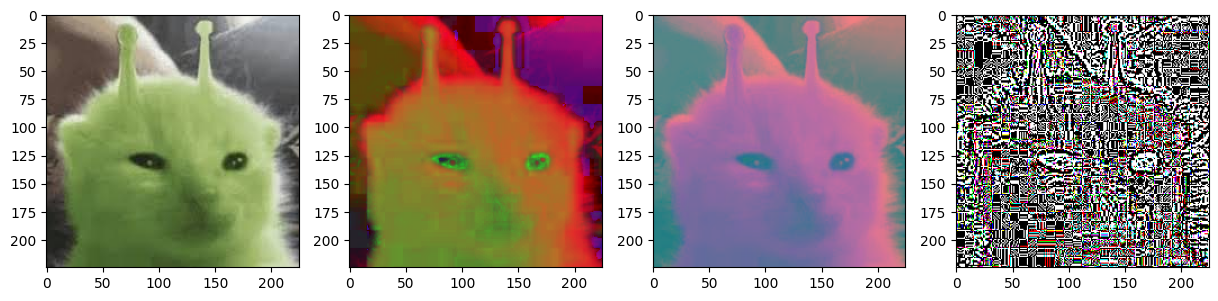

True

In [107]:
fig = plt.figure(figsize=[15,15])

img = cv2.imread('./images/glorp-car.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_laplacian = cv2.Laplacian(img, cv2.CV_64F)

ax = fig.add_subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

ax = fig.add_subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_BGR2RGB)) 

ax = fig.add_subplot(1,4,3)
plt.imshow(img_lab)

ax = fig.add_subplot(1,4,4)
plt.imshow(img_laplacian)
 
plt.show()

cv2.imwrite('./images/outputs/hell-glorp-car.jpg', img_hsv)
cv2.imwrite('./images/outputs/curse-glorp-car.jpg', img_laplacian)

#### 画像のフィルタリング

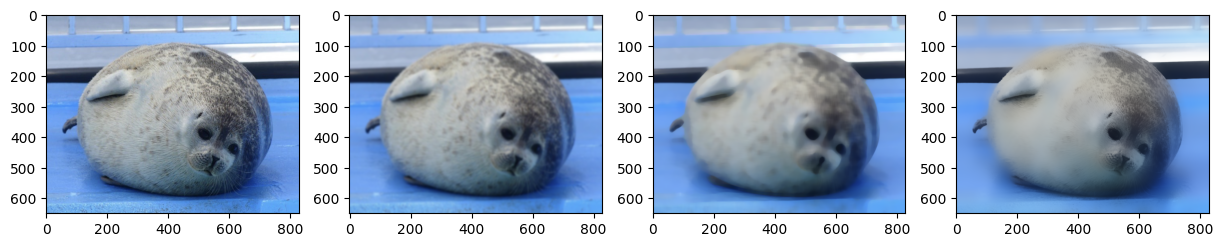

In [108]:
fig = plt.figure(figsize=[15,15])

img = cv2.imread('./images/yo-chan.jpg')
ax = fig.add_subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Gaussian Blur
img_gaussian = cv2.GaussianBlur(img, (15, 15), 0)
ax = fig.add_subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
# Median Blur
img_median = cv2.medianBlur(img, 19)
ax = fig.add_subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
# Bilateral Blur
img_bilateral = cv2.bilateralFilter(img, 50, 100, 100)
ax = fig.add_subplot(1,4,4)
plt.imshow(cv2.cvtColor(img_bilateral, cv2.COLOR_BGR2RGB))
plt.show()

#### グレースケール

C:\Users\pchulaka\AppData\Local\Temp\ipykernel_20280\3977705224.py:13: RuntimeWarning: overflow encountered in scalar add
  img_avg[i, j] = sum(img_avg[i, j]) * 0.5


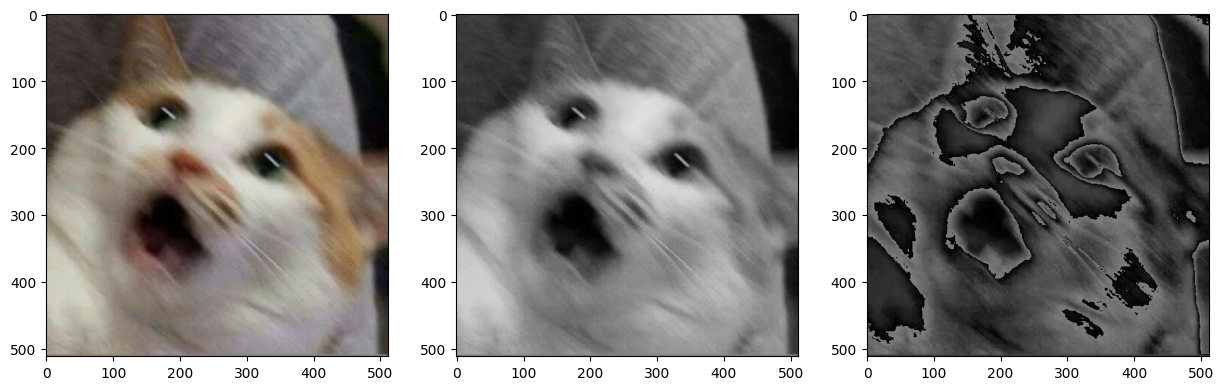

In [109]:
fig = plt.figure(figsize=[15,15])
# Load the input image
img = cv2.imread('./images/car-panic.png')
img_avg = cv2.imread('./images/car-panic.png')
img_cvt_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Obtain the dimensions of the image array
# using the shape method
(row, col) = img.shape[0:2]

for i in range(row):
    for j in range(col):
        # Find the average of the BGR pixel values
        img_avg[i, j] = sum(img_avg[i, j]) * 0.5
    
ax = fig.add_subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
ax = fig.add_subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_cvt_gray, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(img_avg, cv2.COLOR_BGR2RGB))

plt.show()

#### 画像変換行列

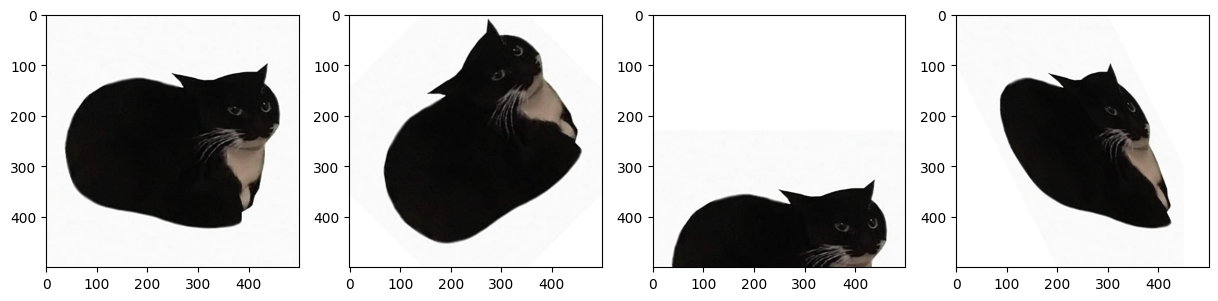

In [110]:
img = cv2.imread('./images/maxwell.jpg')
width, height = img.shape[1], img.shape[0]
center = (img.shape[1] // 2, img.shape[0] // 2)

angle, scale = 45, 1
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height), borderValue=(255,255,255))

tx, ty = 0, 230
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(img, translation_matrix, (width, height), borderValue=(255,255,255))

shearX, shearY = 0.5, 0
transformation_matrix = np.array([[0.7, shearX, 0], [0, 1, shearY]], dtype=np.float32)
shear_translation_matrix = np.array([[1, 0, -50], [0, 1, 0]], dtype=np.float32)
sheared_image = cv2.warpAffine(img, transformation_matrix, (width, height), borderValue=(255,255,255))
centered_sheared_image = cv2.warpAffine(sheared_image, shear_translation_matrix, (width, height), borderValue=(255,255,255))

fig = plt.figure(figsize=[15,15])

ax = fig.add_subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(1,4,2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(1,4,3)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(1,4,4)
plt.imshow(cv2.cvtColor(centered_sheared_image, cv2.COLOR_BGR2RGB))

plt.show()

#### コーナー検出

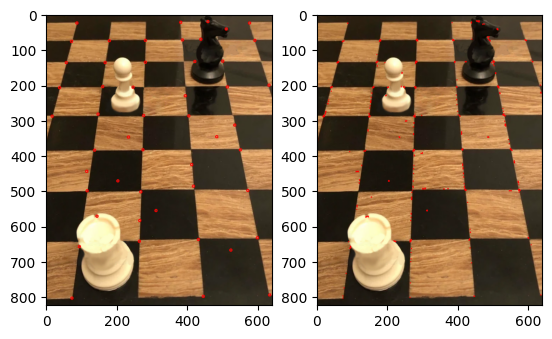

In [6]:
img = cv2.imread('./images/chess-board.webp')
img_copy_for_modification_1 = copy.copy(img)
img_copy_for_modification_2 = copy.copy(img)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners_ShiTomasi = cv2.goodFeaturesToTrack(gray_img, 50, 0.1, 50)
corners_Harris = cv2.cornerHarris(gray_img, 2, 5, 0.07)

corners_ShiTomasi = np.intp(corners_ShiTomasi)

for i in corners_ShiTomasi:
    x, y = i.ravel()
    cv2.circle(img_copy_for_modification_1, (x, y), 3, (0, 0, 255), 2)
    
dest = cv2.dilate(corners_Harris, None)
img_copy_for_modification_2[dest > 0.01 * dest.max()]=[0, 0, 255]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_copy_for_modification_1, cv2.COLOR_BGR2RGB))
ax = fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_copy_for_modification_2, cv2.COLOR_BGR2RGB))
plt.show()

#### 色検出

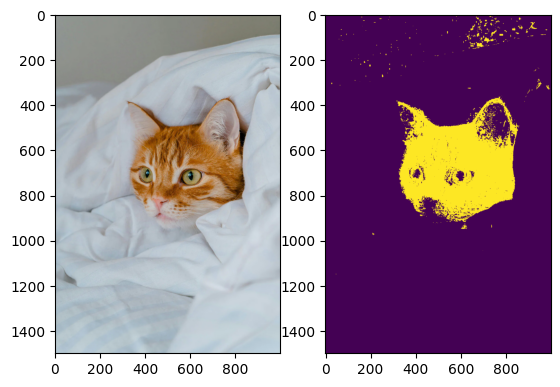

In [112]:
hsv_lower = np.array([10, 0, 0]) #lower orange
hsv_upper = np.array([25, 255, 255]) #upper orage

img = cv2.imread('./images/orange-cat-behavior-8.webp')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
orange_area = cv2.inRange(img_hsv, hsv_lower, hsv_upper)

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB
                        ))

ax = fig.add_subplot(1, 2, 2)
plt.imshow(orange_area)
plt.show()

#### SIFT特徴点

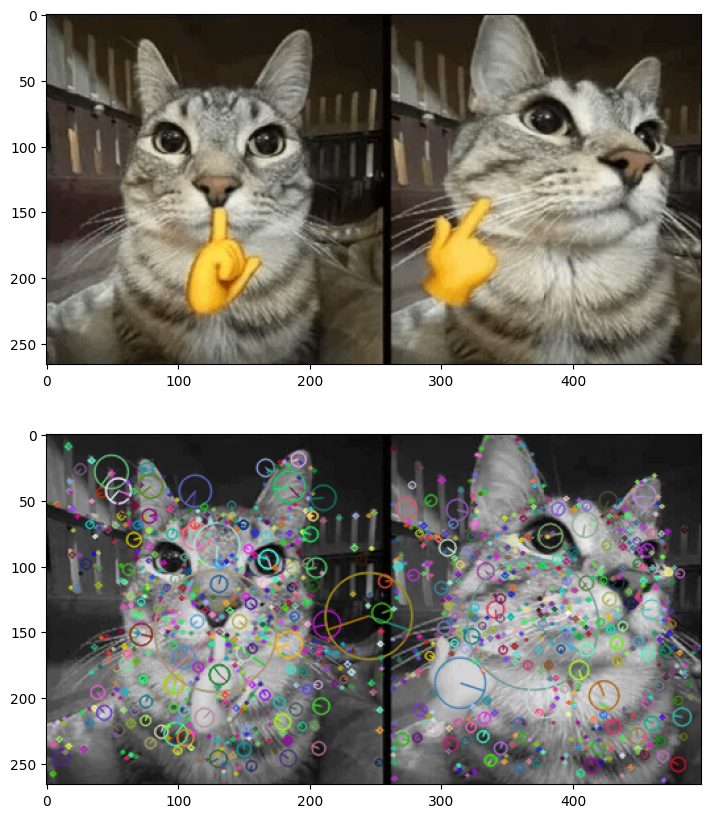

In [113]:
from cv2 import SIFT_create

img = cv2.imread('./images/mewing-car.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = SIFT_create()
key_point = sift.detect(img_gray, None)
img_gray = cv2.drawKeypoints(img_gray, key_point, img_gray, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=[10,10])

ax = fig.add_subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(2, 1, 2)
plt.imshow(img_gray)

plt.show()

#### 特徴点マッチング

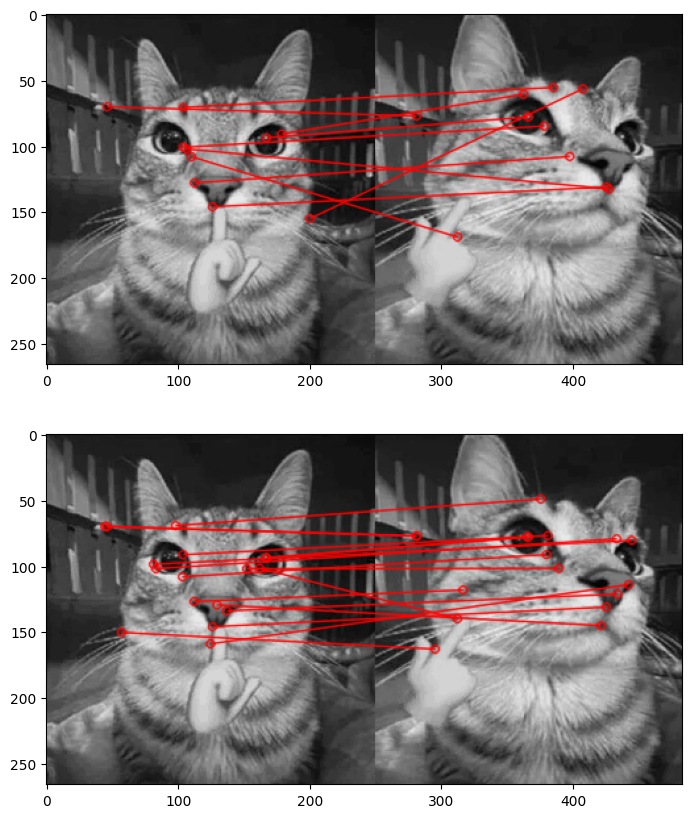

In [44]:
img = cv2.imread('./images/mewing-car.png', 0)
img_1 = img[0:266, 0:250]
img_2 = img[0:266, 265:498]

fig = plt.figure(figsize=[10,10])

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img_1, None)
kp2, des2 = orb.detectAndCompute(img_2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img_1, kp1, img_2, kp2, matches[:10], None, matchColor=(255, 0, 0), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

ax = fig.add_subplot(2,1,1)
plt.imshow(img_matches)

FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH,
                    table_number=6,  # 12
                    key_size=12,     # 20
                    multi_probe_level=1)  # 2

search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
for m_n in matches:
    if len(m_n) == 2:
        m, n = m_n
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
            
img_matches = cv2.drawMatches(img_1, kp1, img_2, kp2, good_matches, None, matchColor=(255, 0, 0), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

ax = fig.add_subplot(2,1,2)
plt.imshow(img_matches)
plt.show()

In [17]:
from cv2 import SIFT_create

cap = cv2.VideoCapture('./videos/huh-cat-cut.mp4')
frame_width, frame_height = int(cap.get(3)), int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./videos/outputs/huh-cat-feature.mp4', fourcc, fps, (frame_width, frame_height))

sift = SIFT_create()

if (cap.isOpened()== False):
    print("Error opening video file")

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        kp = sift.detect(frame_gray, None)
        frame = cv2.drawKeypoints(frame, kp, frame, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        out.write(frame)
        cv2.imshow('Frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [36]:
cap = cv2.VideoCapture('./videos/orange-car-vine-boom.mp4')
frame_width, frame_height = int(cap.get(3)), int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./videos/outputs/orange-car-color-mask.mp4', fourcc, fps, (frame_width, frame_height))

if (cap.isOpened()== False):
    print("Error opening video file")
    
hsv_lower = np.array([10, 75, 100])
hsv_upper = np.array([30, 255, 255])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        roi_area = cv2.inRange(frame_hsv, hsv_lower, hsv_upper)
        color_mask = cv2.cvtColor(roi_area, cv2.COLOR_GRAY2BGR)
        color_mask[np.where((color_mask != [0, 0, 0]).all(axis=2))] = [0, 0, 255]
        overlayed = cv2.addWeighted(frame, 1, color_mask, 0.8, 0)
        cv2.imshow("ROI mask", roi_area)
        cv2.imshow("Overlayed Frame", overlayed)
        out.write(overlayed)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()